<a href="https://colab.research.google.com/github/CarolineVicente/Machine_Learn/blob/main/classificacao_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
identificacoes_treino.min()
identificacoes_treino.max()

np.uint8(9)

Exibição dos dados

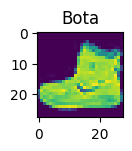

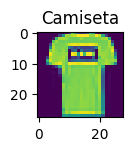

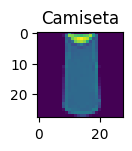

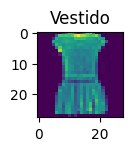

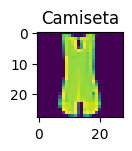

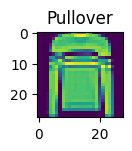

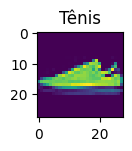

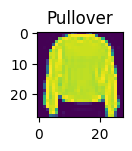

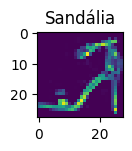

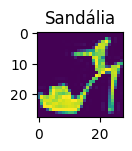

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

# plt.imshow(imagens_treino[0])
# plt.title(identificacoes_treino[0])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
  plt.show()
  plt.colorbar


Normalizando as Imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                            keras.layers.Dense(512, activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dropout(0.3),
                            keras.layers.Dense(10, activation='softmax')])

adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                             monitor='val_loss',
                                             save_best_only=True)]

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino,
                       identificacoes_treino,
                       batch_size=480,
                       epochs=5,
                       validation_split=0.2,
                       callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.6685 - loss: 0.9380 - val_accuracy: 0.8480 - val_loss: 0.4154
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8409 - loss: 0.4412 - val_accuracy: 0.8598 - val_loss: 0.3855
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8599 - loss: 0.3838 - val_accuracy: 0.8672 - val_loss: 0.3623
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8662 - loss: 0.3634 - val_accuracy: 0.8735 - val_loss: 0.3477
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8729 - loss: 0.3461 - val_accuracy: 0.8752 - val_loss: 0.3401


Sumário do Modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

Pesos da primeira camada Dense


In [8]:
pesos_camada_dense = modelo.layers[1].get_weights() #multiplicação de matrizes
pesos_camada_dense

[array([[ 0.06139898, -0.00404812,  0.03783217, ...,  0.0703321 ,
          0.0453156 ,  0.03465578],
        [-0.00572284, -0.00967255, -0.00656828, ...,  0.10450913,
         -0.0557104 ,  0.00331053],
        [-0.02350396,  0.01553747, -0.05572602, ...,  0.02271093,
          0.01047464, -0.00108554],
        ...,
        [ 0.04492891, -0.00788716, -0.18407859, ...,  0.04259321,
          0.03845117, -0.02285212],
        [-0.00503795, -0.0106441 , -0.17481646, ..., -0.00777504,
         -0.0415128 ,  0.018505  ],
        [-0.0078148 , -0.06152369, -0.13381481, ...,  0.0014863 ,
          0.07034613, -0.03488955]], dtype=float32),
 array([ 0.06659538, -0.01239295, -0.08608271, -0.05820623,  0.02673335,
         0.17615394,  0.07327849, -0.01236396, -0.01783334, -0.10210386,
        -0.01139755, -0.01353999,  0.05363647,  0.01921636,  0.00911893,
        -0.0798117 , -0.00950539,  0.12078016, -0.009734  ,  0.11284207,
        -0.00489212,  0.00930898,  0.13188538,  0.09143447,  0.023

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense # são as medidas que mostram se estamos próximos ou distantes de conseguir o resultado esperado

array([ 0.06659538, -0.01239295, -0.08608271, -0.05820623,  0.02673335,
        0.17615394,  0.07327849, -0.01236396, -0.01783334, -0.10210386,
       -0.01139755, -0.01353999,  0.05363647,  0.01921636,  0.00911893,
       -0.0798117 , -0.00950539,  0.12078016, -0.009734  ,  0.11284207,
       -0.00489212,  0.00930898,  0.13188538,  0.09143447,  0.02322434,
        0.03936642,  0.00874773,  0.05242645,  0.12767267, -0.03363062,
        0.03251096,  0.0740442 ,  0.17516582,  0.01507724, -0.04071812,
        0.12539361,  0.08157133, -0.01621109,  0.09786791,  0.13578837,
        0.01264565,  0.1264405 ,  0.10422656,  0.1331114 ,  0.02631349,
        0.00425628,  0.01444572,  0.12447012,  0.04379778,  0.08263628,
        0.1050284 , -0.04100927, -0.01497229,  0.07454711,  0.08066174,
        0.1024788 ,  0.05857928, -0.01577403,  0.16995503,  0.02999923,
       -0.11495627,  0.023285  ,  0.07956315, -0.01400586,  0.07204071,
       -0.01161103,  0.10531937, -0.01165048, -0.05889823, -0.00

Salavando e carregando o modelo treinado

In [10]:
modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

Vizualizando as acurácias de treino e validação por épocas

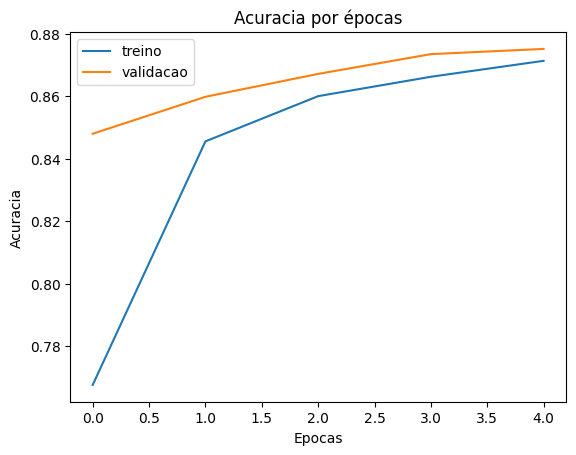

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend(['treino', 'validacao'])

Vizualizando as perdas de treino e validação por épocas

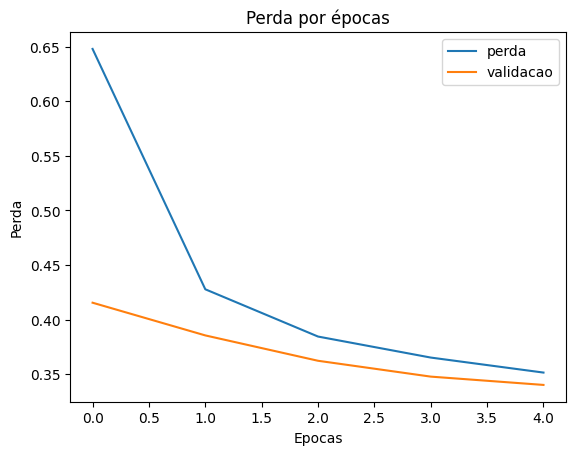

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend(['perda', 'validacao'])

Testando o modelo e o modelo salvo

In [13]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes_modelo_salvo[5]))
print('numero identificacao da imagem:', identificacoes_teste[5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
resultado teste: 1
numero identificacao da imagem: 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
resultado teste: 1
numero identificacao da imagem: 1


In [14]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 42.6295
Perda do teste:  46.09516906738281
Acuracia do teste:  0.8634999990463257
